<a href="https://colab.research.google.com/github/ak55634/Assignment-Visualization/blob/main/MIMIC_ML_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn tensorflow


In [4]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

# Example: Load patient dataset
patients = pd.read_csv('PATIENTS.csv')

# Inspect data
print(patients.head())

# Data preprocessing (handle missing values, encode categorical data, etc.)
patients['AGE'] = 2025 - patients['dob'].str[:4].astype(int)  # Derive Age
patients = patients.dropna()


Saving PATIENTS.csv to PATIENTS (1).csv
   row_id  subject_id gender                  dob                  dod  \
0    9467       10006      F  2094-03-05 00:00:00  2165-08-12 00:00:00   
1    9472       10011      F  2090-06-05 00:00:00  2126-08-28 00:00:00   
2    9474       10013      F  2038-09-03 00:00:00  2125-10-07 00:00:00   
3    9478       10017      F  2075-09-21 00:00:00  2152-09-12 00:00:00   
4    9479       10019      M  2114-06-20 00:00:00  2163-05-15 00:00:00   

              dod_hosp              dod_ssn  expire_flag  
0  2165-08-12 00:00:00  2165-08-12 00:00:00            1  
1  2126-08-28 00:00:00                  NaN            1  
2  2125-10-07 00:00:00  2125-10-07 00:00:00            1  
3                  NaN  2152-09-12 00:00:00            1  
4  2163-05-15 00:00:00  2163-05-15 00:00:00            1  


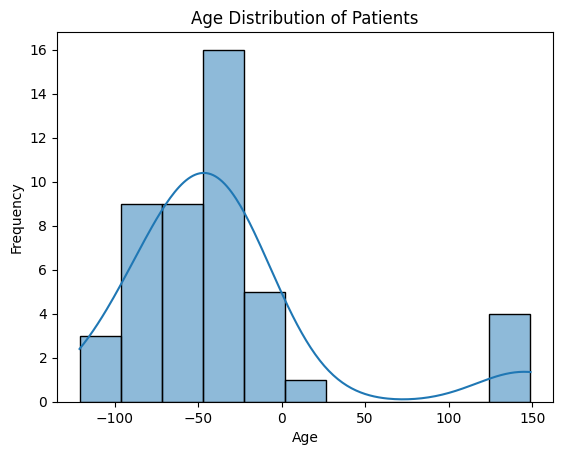

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Plot age distribution
sns.histplot(patients['AGE'], kde=True)
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


In [8]:
# Example: Features (X) and Target (y)
X = patients[['AGE', 'gender']]
# Convert 'gender' column to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['gender'], drop_first=True)  # drop_first to avoid multicollinearity
y = patients['expire_flag']

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load patient dataset
patients = pd.read_csv('PATIENTS.csv')
# Example: Features (X) and Target (y)
X = patients[['AGE', 'gender']]
# Convert 'gender' column to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['gender'], drop_first=True)  # drop_first to avoid multicollinearity
y = patients['expire_flag']
# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Convert data to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')
# Train Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
# Evaluate
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
# Define the model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

Accuracy: 1.0


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 1.0000 - loss: 0.2522 - val_accuracy: 1.0000 - val_loss: 0.0596
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 288ms/step - accuracy: 1.0000 - loss: 0.0691 - val_accuracy: 1.0000 - val_loss: 0.0264
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step - accuracy: 1.0000 - loss: 0.0298 - val_accuracy: 1.0000 - val_loss: 0.0155
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 281ms/step - accuracy: 1.0000 - loss: 0.0192 - val_accuracy: 1.0000 - val_loss: 0.0103
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 378ms/step - accuracy: 1.0000 - loss: 0.0125 - val_accuracy: 1.0000 - val_loss: 0.0073
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 1.0000 - loss: 0.0088 - val_accuracy: 1.0000 - val_loss: 0.0054
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 385ms/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 1.0000 - val_loss: 0.0041
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 513ms/step - accuracy: 1.0000 - loss: 0.0045 - val_accuracy: 1.0000 - val_loss: 0.

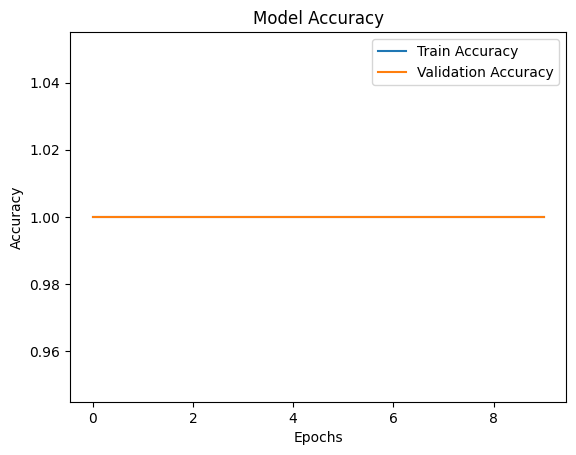

In [11]:
# Plot model performance
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


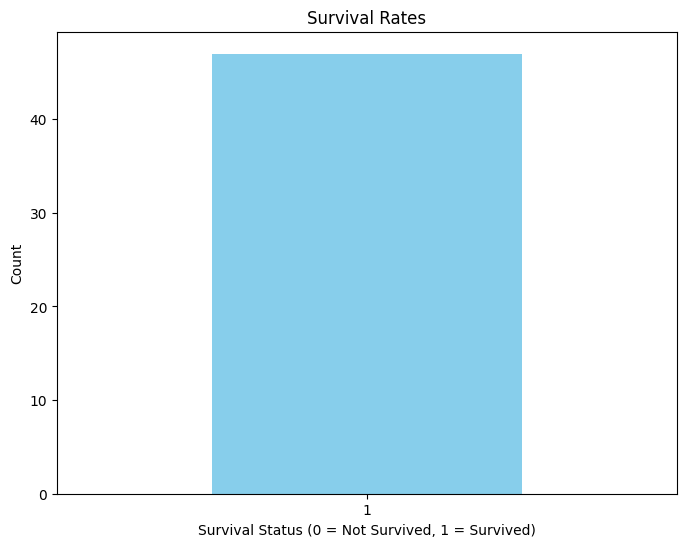

In [12]:
# Survival rate visualization
survival_counts = patients['expire_flag'].value_counts()

plt.figure(figsize=(8, 6))
survival_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Survival Rates")
plt.xlabel("Survival Status (0 = Not Survived, 1 = Survived)")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


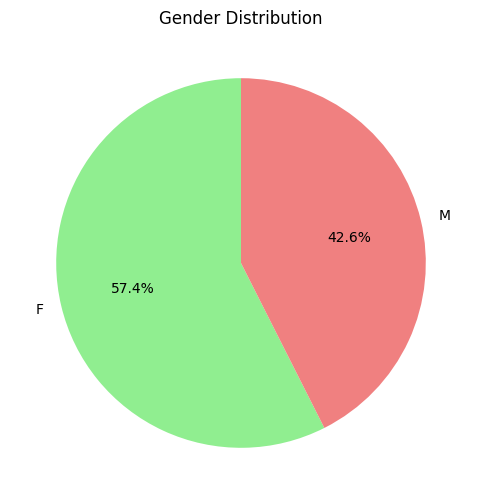

In [13]:
# Gender distribution visualization
gender_counts = patients['gender'].value_counts()

plt.figure(figsize=(8, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'], startangle=90)
plt.title("Gender Distribution")
plt.ylabel("")
plt.show()
